## Language Analysis of Alexithymic Discourse

<hr>

Alexithymic Language Project / raul@psicobotica.com / V2 release (sept 2020)

<hr>

## Latent Space Feature Engineering (embeddings)
### Checking Google Universal Sentence Encoder - Multilingual Large 3

- TF Hub Pre-trained model: https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3 


### Load my dataset 
(After embedding calculation in Colab)

In [74]:
import pandas as pd 
import numpy as np

In [2]:
embeds_dataset_path = "https://raw.githubusercontent.com/raul-arrabales/alexithymic-lang/master/models/Prolexitim_v2_features-embed-usem.csv"

alex_df = pd.read_csv(embeds_dataset_path, header=0, delimiter=";")

In [3]:
alex_df.columns

Index(['Code', 'TAS20', 'F1', 'F2', 'F3', 'Gender', 'Age', 'Card',
       'T_Metaphors', 'T_ToM', 'T_FP', 'T_Interpret', 'T_Desc', 'T_Confussion',
       'Text', 'Alex_A', 'Alex_B', 'Words', 'Sentences', 'Tokens',
       'Tokens_Stop', 'Tokens_Stem', 'POS', 'NER', 'DEP', 'Chars', 'avgWL',
       'avgSL', 'Pun_Count', 'Stop_Count', 'RawTokens', 'Title_Count',
       'Upper_Count', 'VERB_Count', 'NOUN_Count', 'SYM_Count', 'ADV_Count',
       'PUNCT_Count', 'INTJ_Count', 'CCONJ_Count', 'ADJ_Count', 'AUX_Count',
       'DET_Count', 'SCONJ_Count', 'PRON_Count', 'NUM_Count', 'PROPN_Count',
       'ADP_Count', 'VERB_Ratio', 'NOUN_Ratio', 'SYM_Ratio', 'ADV_Ratio',
       'PUNCT_Ratio', 'INTJ_Ratio', 'CCONJ_Ratio', 'ADJ_Ratio', 'AUX_Ratio',
       'DET_Ratio', 'SCONJ_Ratio', 'PRON_Ratio', 'NUM_Ratio', 'PROPN_Ratio',
       'ADP_Ratio', 'TTR', 'HTR', 'Embed_USEM'],
      dtype='object')

In [4]:
alex_df.head(2)

,Code,TAS20,F1,F2,F3,Gender,Age,Card,T_Metaphors,T_ToM,...,AUX_Ratio,DET_Ratio,SCONJ_Ratio,PRON_Ratio,NUM_Ratio,PROPN_Ratio,ADP_Ratio,TTR,HTR,Embed_USEM
0,bc39e22ca5dba59fbd97c27987878f56,40,16,9,15,2,22,1,0,1,...,0.125000,0.187500,0.062500,0.125,0.0,0.0,0.125,0.562500,0.875,[-7.31239393e-02 8.52924492e-03 5.43712601e-...
1,bc39e22ca5dba59fbd97c27987878f56,40,16,9,15,2,22,13HM,0,1,...,0.142857,0.142857,0.142857,0.000,0.0,0.0,0.000,0.857143,1.000,[-4.18877453e-02 5.60541414e-02 9.09477472e-...


## Check doc vector reading

In [14]:
alex_df.Embed_USEM.iloc[0][0:300]

'[-7.31239393e-02  8.52924492e-03  5.43712601e-02  2.08456889e-02\n  9.62229073e-03 -2.31775343e-02 -1.51738869e-02 -4.06471193e-02\n  9.09910426e-02  5.55083230e-02  2.58596018e-02  2.69212648e-02\n -4.07966934e-02  3.81241878e-03 -9.27785039e-02 -6.52729627e-03\n  1.31709967e-02 -8.98597389e-02  5.8614'

In [6]:
# Check one embedding: 
import ast 

str_embed = alex_df.Embed_USEM.iloc[0]

In [7]:
str_embed = str_embed.replace('\n', '')
str_embed = ' '.join(str_embed.split())
str_embed = str_embed.replace(' ', ', ')
str_embed

'[-7.31239393e-02, 8.52924492e-03, 5.43712601e-02, 2.08456889e-02, 9.62229073e-03, -2.31775343e-02, -1.51738869e-02, -4.06471193e-02, 9.09910426e-02, 5.55083230e-02, 2.58596018e-02, 2.69212648e-02, -4.07966934e-02, 3.81241878e-03, -9.27785039e-02, -6.52729627e-03, 1.31709967e-02, -8.98597389e-02, 5.86147793e-02, 5.48405610e-02, -3.24900411e-02, -1.00729443e-01, -4.92807068e-02, -2.05314662e-02, -4.82679754e-02, -1.29080620e-02, -3.21022272e-02, 1.60321034e-02, -3.05626094e-02, -3.88347730e-02, 4.80759218e-02, 4.10175696e-03, -9.00816452e-03, -5.84913231e-02, -6.34448528e-02, -1.05560206e-01, -8.32465105e-03, 3.01267579e-02, -2.32454818e-02, -6.74978271e-02, -6.01511151e-02, -1.08380485e-02, 5.39895408e-02, -7.65051274e-03, 6.45901188e-02, 4.71151760e-03, -2.56772581e-02, 5.28126657e-02, 3.70419323e-02, 1.78743470e-02, 5.87179363e-02, -3.33281420e-02, -8.67249444e-03, 3.61799635e-03, 2.07091067e-02, 5.44809066e-02, -4.44121175e-02, 4.10634130e-02, -3.86134237e-02, 3.63026485e-02, -3.532

In [8]:
embed = ast.literal_eval(str_embed)

In [9]:
type(embed)

list

In [12]:
len(embed)

512

## Extracting doc vectors from CSV format

In [62]:
def get_DocVec( vec_txt ):
    
    # Process string as stored in the CSV:
    str_embed = ''
    str_embed = vec_txt.replace('\n', '')
    str_embed = ' '.join(str_embed.split())
    str_embed = str_embed.replace(' ', ', ')
    
    # From formatted string to list
    
    try:
        embed = ast.literal_eval(str_embed)        
    except SyntaxError as ex:
        embed = []
    
    return embed

In [63]:
get_DocVec( "[3%,4$]" )

[]

In [64]:
alex_df.Text.iloc[12]

'Se levantó Jaime por la mañana sin poder creer lo que acaba de pasar, su mujer, su esposa desde hace 15 años había fallecido de la noche a la mañana. Madre mia, querría por todos los medios que eso fuera un sueño, pero no era así. Cómo se lo pensaba decir a las niñas, y sus padres. Qué horrible.'

In [66]:
get_DocVec(alex_df.Embed_USEM.iloc[11])[0:4]

[-0.0499770753, -0.0436713472, 0.0532757044, 0.0132640311]

In [88]:
alex_df.shape

(381, 66)

## Using doc vecs for alexithymia classification
- Building a df with features being the 512 dims of the doc vectors: Xi.
- And label to be predictied (y) being alexithymia (Alex_A).
- Using a random forest to try to predict y as a function of Xi --> y' = f(Xi)

In [82]:
# New dataframes with features (512 dims of the doc vec) and target (alexithymia class)
col_names = []
for i in range(512):
    col_names.append("x_" + str(i))
col_names.append("y")   

ml_df = pd.DataFrame(columns = col_names)

In [83]:
ml_df

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_503,x_504,x_505,x_506,x_507,x_508,x_509,x_510,x_511,y


In [84]:
# Fill the new df
for index, row in alex_df.iterrows():
    docvec = get_DocVec(row.Embed_USEM)
    if ( len(docvec) == 512):
        docvec.append(row.Alex_A)
        # print(str(index) + ": " + str(docvec))
        # print(str(index))
        a_series = pd.Series(docvec, index=ml_df.columns)
        ml_df = ml_df.append(a_series, ignore_index=True)

In [85]:
ml_df.sample(6)

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_503,x_504,x_505,x_506,x_507,x_508,x_509,x_510,x_511,y
6,-0.042583,-0.026122,0.072293,-0.031568,-0.050732,-0.049053,-0.010643,-0.070609,0.093300,0.044327,...,-0.047869,-0.053675,-0.038461,0.009039,0.050932,-0.007903,0.017709,0.060860,0.007182,0.0
304,-0.042144,0.020095,0.046625,-0.028251,-0.025519,-0.016321,-0.022097,-0.066276,0.082082,0.069979,...,0.006712,-0.047060,-0.043909,-0.004645,0.052653,0.015768,-0.017322,0.028792,0.032775,1.0
318,-0.015038,-0.010592,0.054217,-0.006452,-0.059231,-0.019235,-0.043250,-0.072545,0.075841,0.064178,...,-0.021962,-0.048283,-0.035060,0.031862,0.060261,0.030374,-0.024699,0.016523,0.058286,0.0
160,-0.024376,0.013349,0.067786,-0.000418,-0.038532,-0.041453,-0.059419,-0.067756,0.075298,0.068596,...,-0.048566,-0.033402,-0.038841,0.024853,0.051833,0.054188,0.002309,0.025766,0.046561,0.0
66,-0.018161,0.016608,0.063132,-0.018519,-0.036722,-0.020456,-0.040975,-0.065057,0.078790,0.056758,...,-0.029739,-0.046248,-0.016601,-0.011005,0.058983,0.047400,0.008180,0.046651,0.023453,0.0
209,-0.044084,0.003223,0.075401,0.025500,-0.026090,-0.013931,-0.027696,-0.072641,0.095963,0.043599,...,-0.019119,-0.045525,-0.038326,0.013268,0.037031,0.018315,0.021758,0.001306,0.052808,0.0


In [87]:
ml_df.shape

(356, 513)

### Train/Test sets

In [89]:
# Labels are the values we want to predict
labels = np.array(ml_df['y'])

In [90]:
# Remove the labels from the features
# axis 1 refers to the columns
features = ml_df.drop('y', axis = 1)

In [91]:
# Saving feature names for later use
feature_list = list(features.columns)

In [92]:
# Convert to numpy array
features = np.array(features)

In [93]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [94]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (267, 512)
Training Labels Shape: (267,)
Testing Features Shape: (89, 512)
Testing Labels Shape: (89,)


### Vector 3D Visualization per class

In [124]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

In [116]:
features.shape

(356, 512)

In [121]:
# Reduce dimensionality to 2D
tsne = TSNE(n_components=3)
tsne_3D = tsne.fit_transform(features)

In [122]:
# df with 3D projections of vectors
df_3D = pd.DataFrame(tsne_3D, columns=['tsne_0', 'tsne_1', 'tsne_2'])

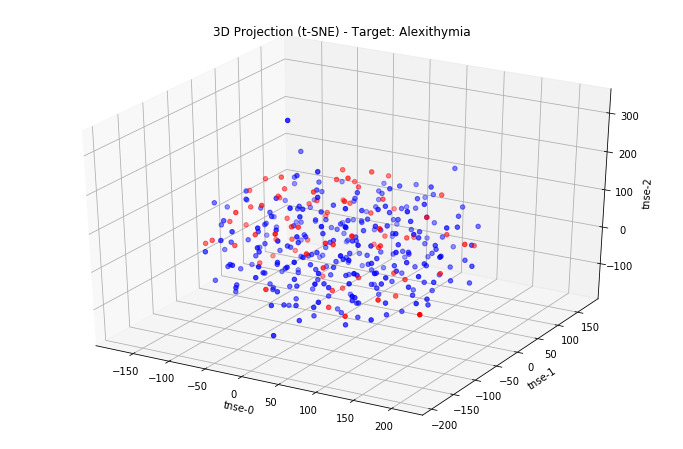

In [129]:
colors = {0: 'blue', 1: 'red'}
ax = plt.figure(figsize=(12,8)).gca(projection='3d')
ax.scatter(
    xs=df_3D["tsne_0"], 
    ys=df_3D["tsne_1"], 
    zs=df_3D["tsne_2"], 
    c=[colors[xi] for xi in labels]
)
ax.set_xlabel('tnse-0')
ax.set_ylabel('tnse-1')
ax.set_zlabel('tnse-2')
plt.title("3D Projection (t-SNE) - Target: Alexithymia")
plt.show()

### Trying to predict with a Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [97]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

### Evaluating the model
- See https://en.wikipedia.org/wiki/Receiver_operating_characteristic 

In [98]:
test_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 0.])

In [99]:
predictions

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0.])

In [102]:
# Create confusion matrix
cm = pd.crosstab(test_labels, predictions, rownames=['Actual'], colnames=['Predicted'])
cm

Predicted,0.0,1.0
Actual,,
0.0,64,7
1.0,15,3


In [105]:
# Total
Total = cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0]
Total

89

In [107]:
# Hits
Hits = cm[0][0] + cm[1][1]
Hits

67

In [108]:
## Accuracy (Acc)
Acc = Hits / Total
Acc

0.7528089887640449

In [110]:
# True Positives (TP)
TP = cm[0][0] 
TP

64

In [111]:
# True Negatives (TN)
TN = cm[1][1]
TN

3

In [113]:
# False Positives (FP)
FP = cm[1][0] 
FP

7

In [114]:
# False Negatives (FN)
FN = cm[0][1] 
FN

15

In [101]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(test_labels, predictions))

Accuracy: 0.7528089887640449
